In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Ряд 1

In [6]:
series1 = pd.read_csv("/content/daily-total-female-births-in-cal.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


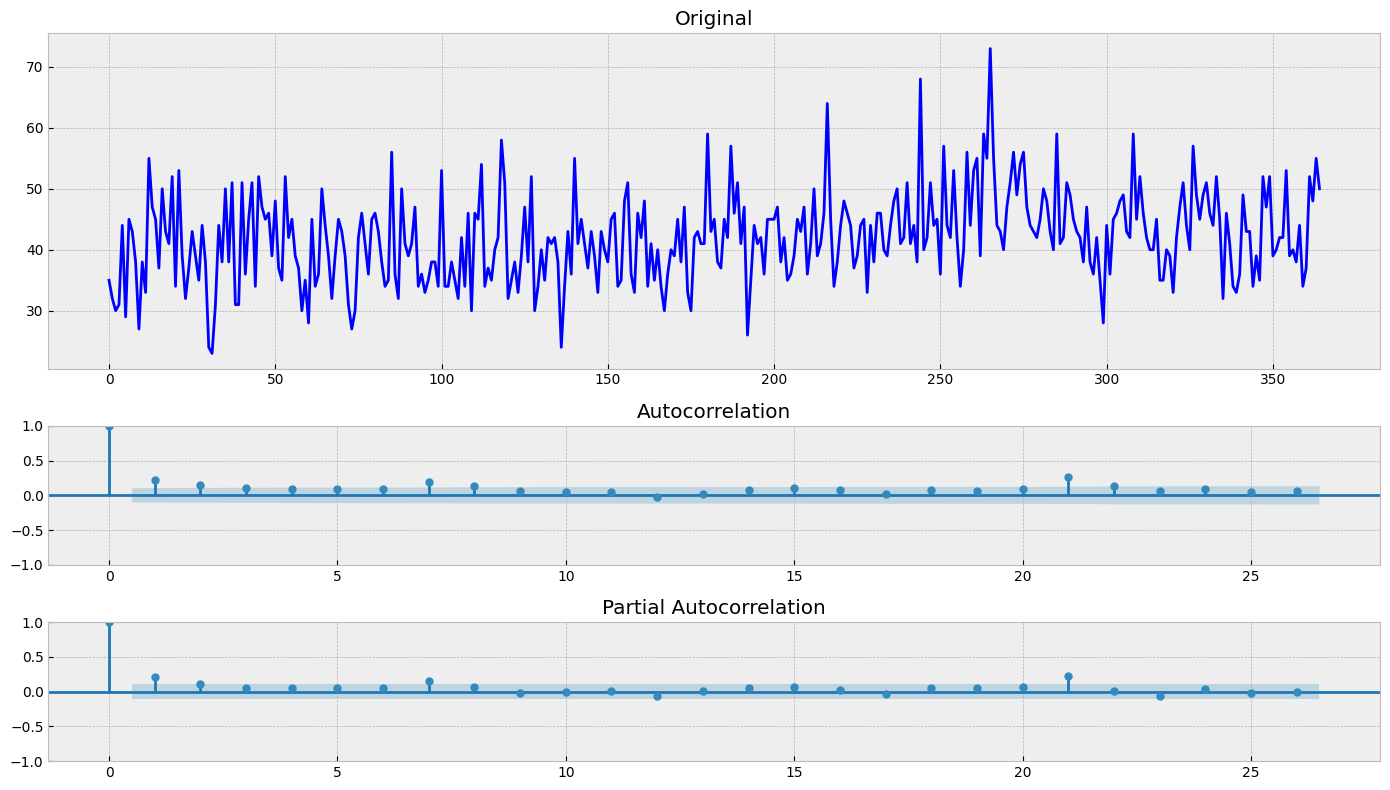

In [7]:
tsplot(series1)

Вывод по первой серии: тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда. Следовательно, ряд стационарен.

Ряд 2

In [9]:
series2 = pd.read_csv("/content/international-airline-passengers.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


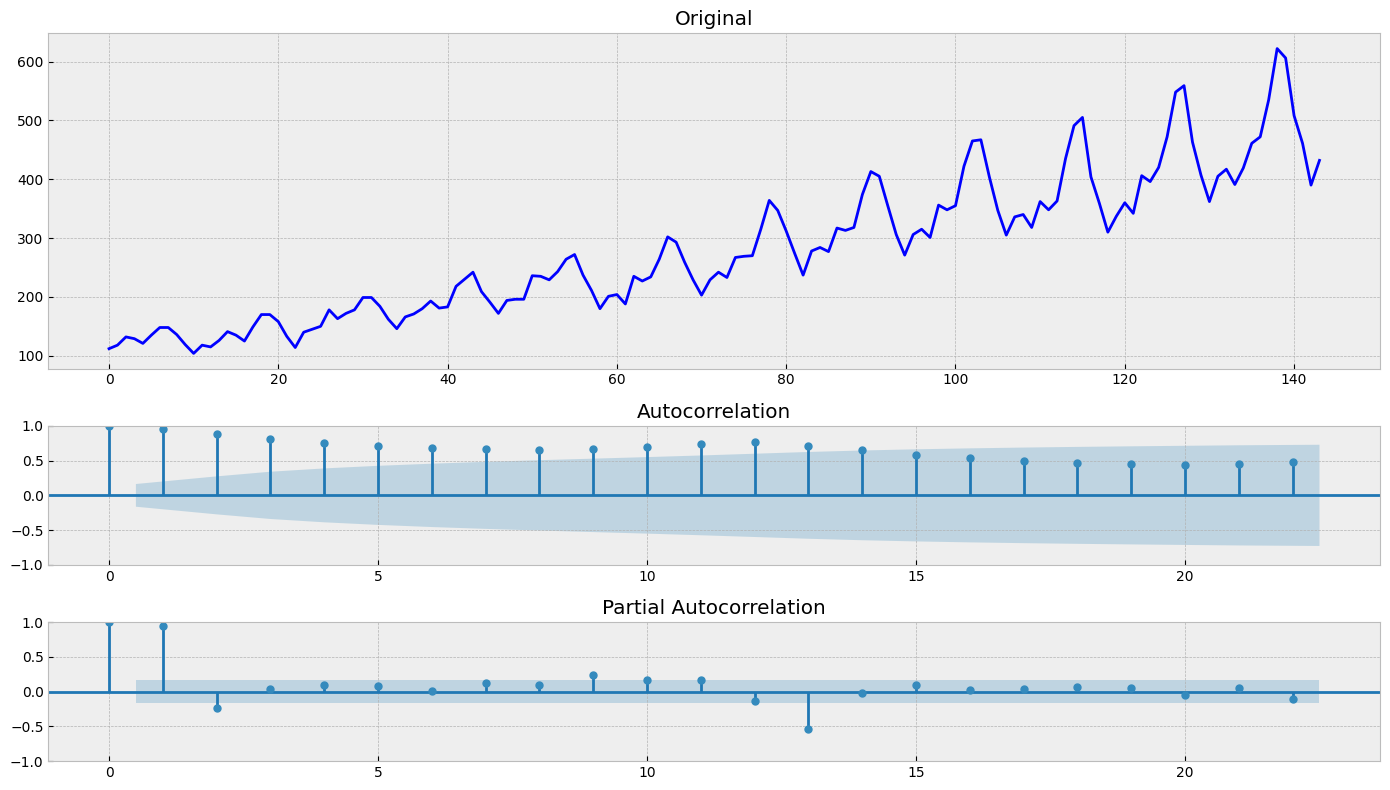

In [10]:
tsplot(series2)

В серии 2 присуствует нестанционарность (тренд, сезонность).

Выполним преобразование Бокса-Кокса, сделав дисперсию более однородной и приблизив распределение к нормальному

In [11]:
series2 = boxcox(series2, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


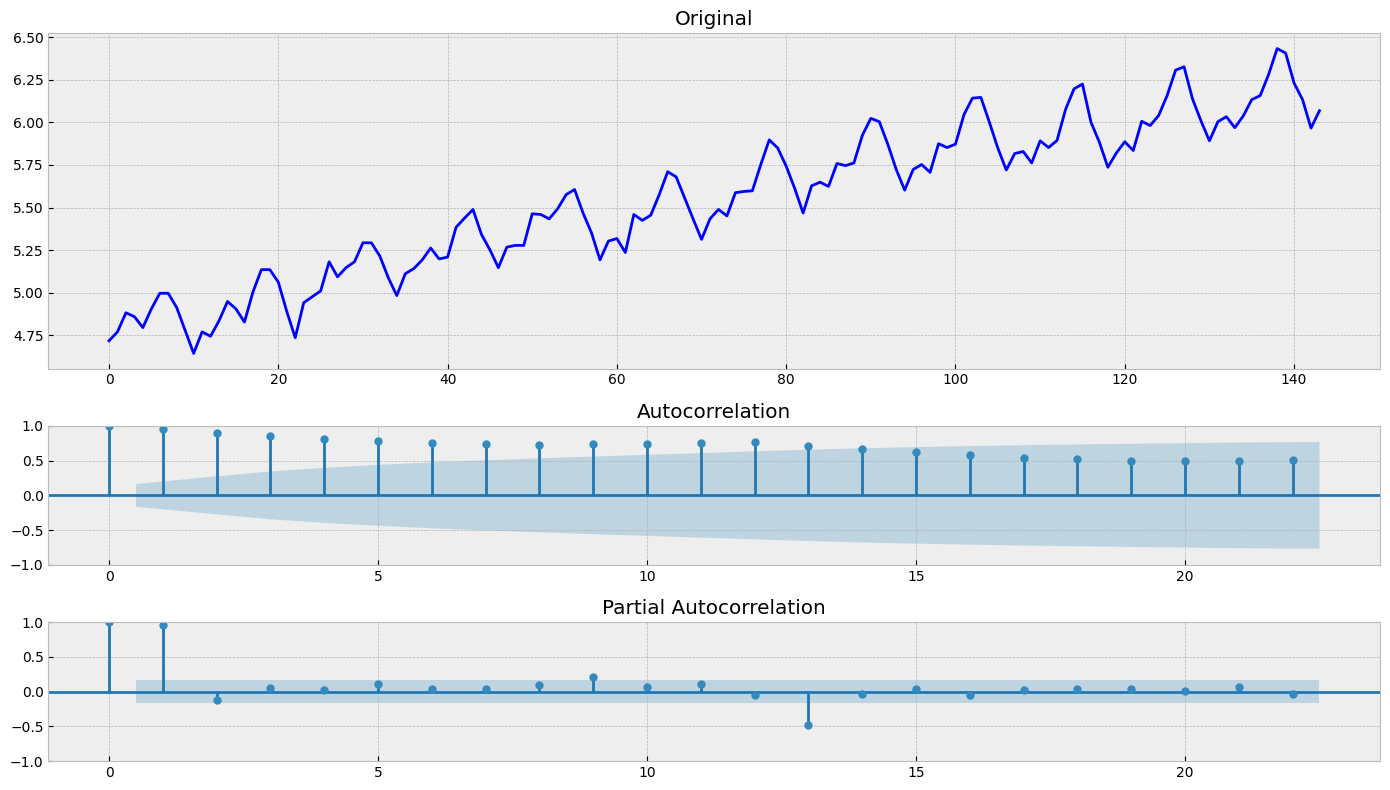

In [13]:
tsplot(series2)

На графике видны тренд и сезонность. Применяем дифференциацию (по графику видно, что, скорее всего, лаг равен 12).

In [16]:
series2 = series2[12:] - series2[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


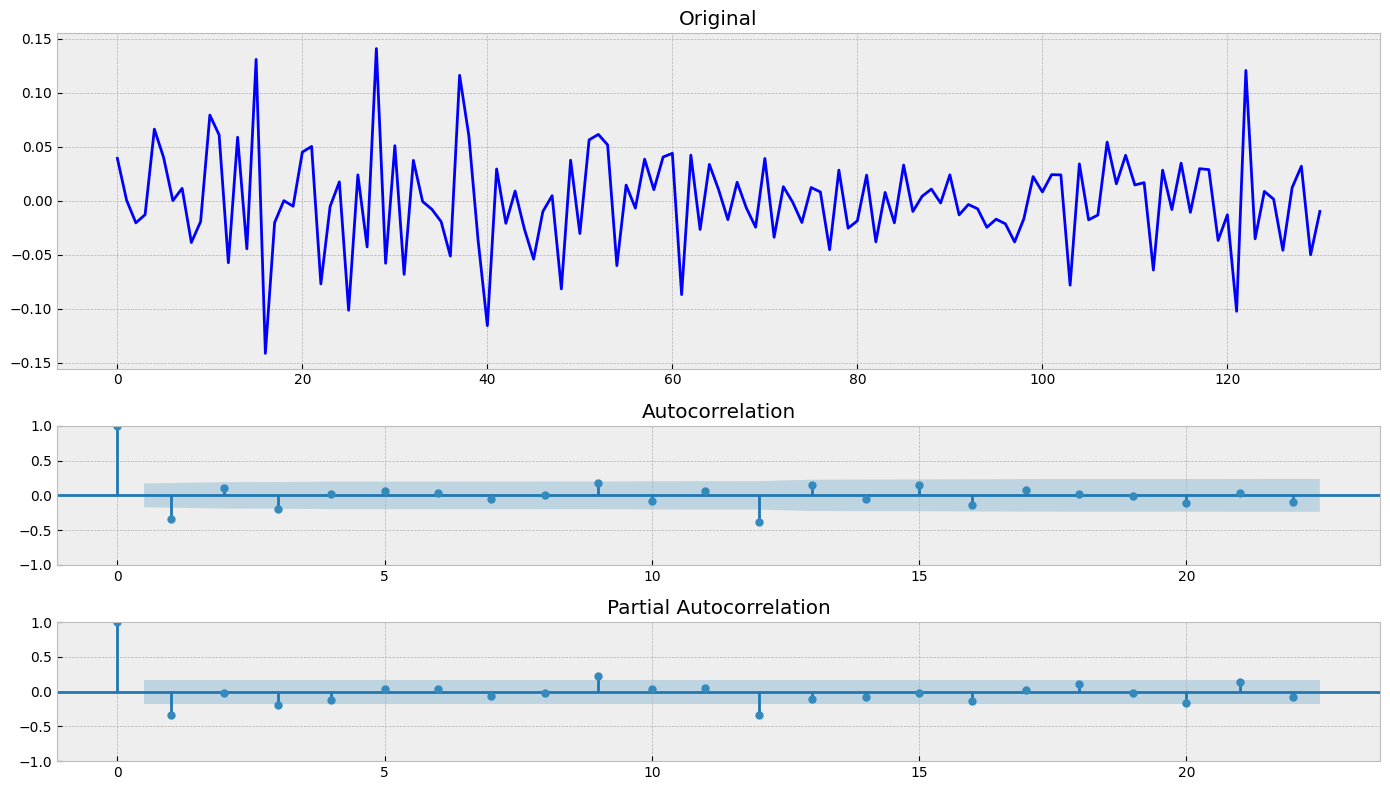

In [17]:
tsplot(series2)

Вывод по второй серии: тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда. Следовательно, ряд стационарен.


Ряд 3

In [58]:
series3 = pd.read_csv("/content/mean-monthly-air-temperature-deg.csv")['Deg']

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


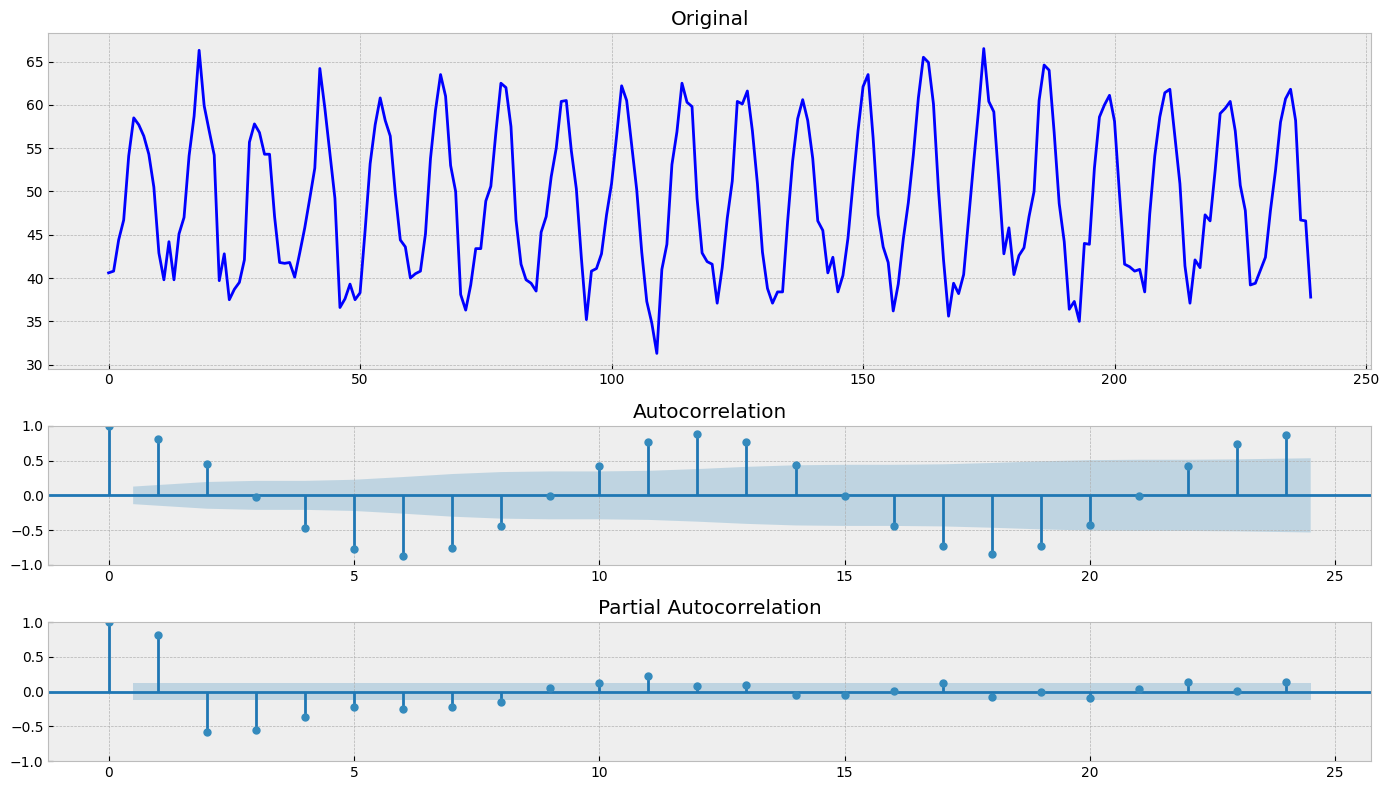

In [55]:
tsplot(series3)

Хотя значение p-value меньше 0.05, на коррелограмме видна сезонность. Воспользуемся дифференцированием.

In [59]:
series3 = np.diff(series3, 12)

Results of Dickey-Fuller Test:
Test Statistic                -1.672894e+01
p-value                        1.388342e-29
#Lags Used                     1.500000e+01
Number of Observations Used    2.120000e+02
Critical Value (1%)           -3.461578e+00
Critical Value (5%)           -2.875272e+00
Critical Value (10%)          -2.574089e+00
dtype: float64


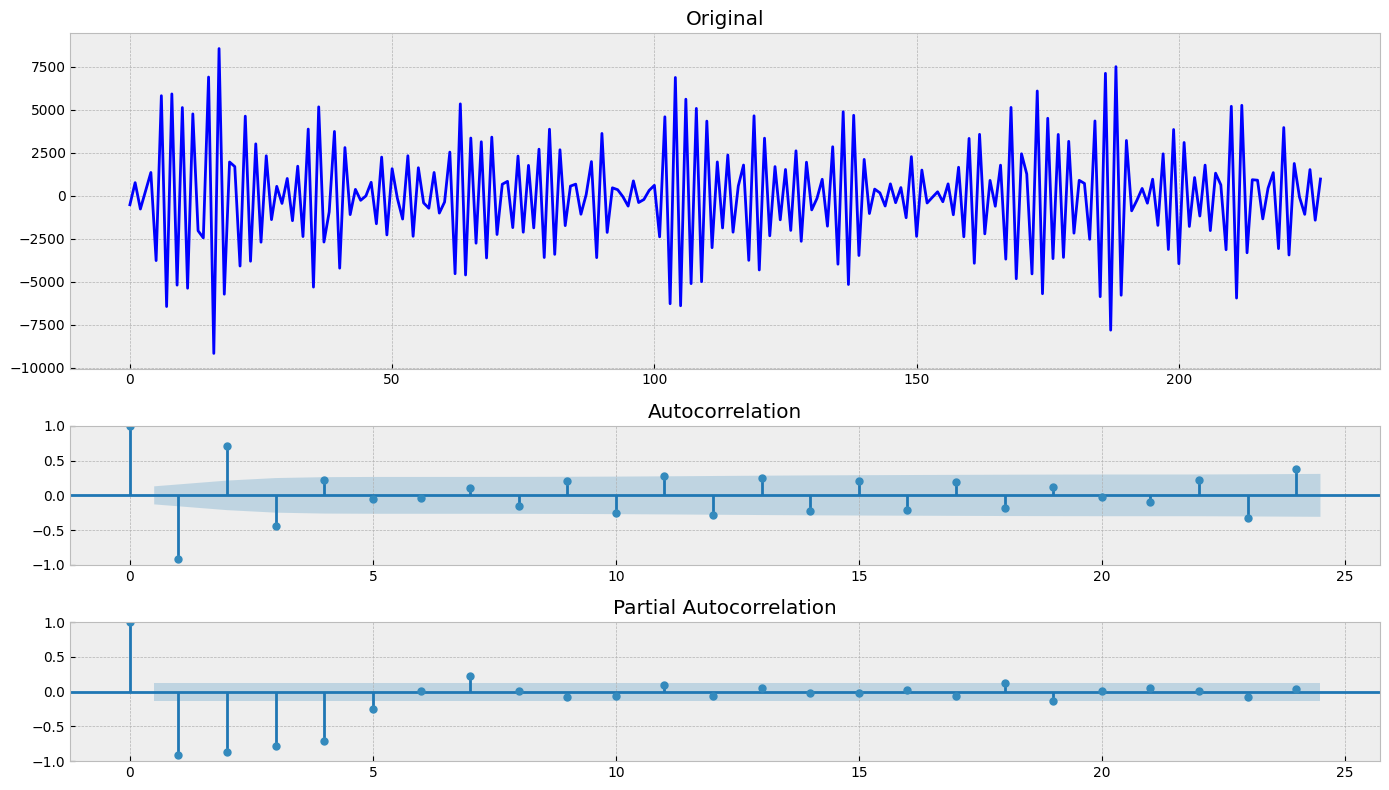

In [60]:
tsplot(series3)

Вывод по третьей серии: тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда. Следовательно, ряд стационарен.

Ряд 4

In [62]:
series4 = pd.read_csv("/content/monthly-boston-armed-robberies-j.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


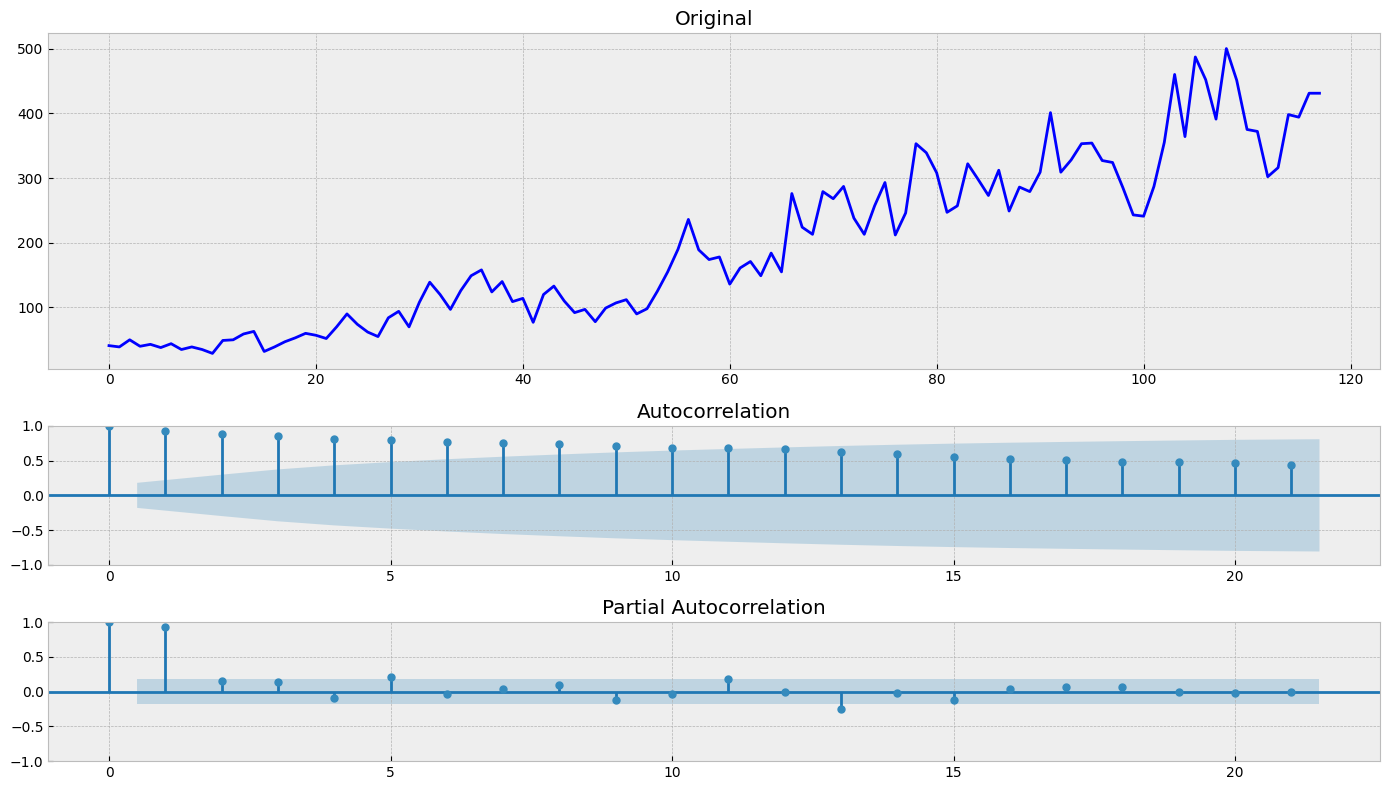

In [63]:
tsplot(series4)

Тест Дики-Фуллера не позволяет говорить о стационарности ряда. На графике виден тренд. Воспользуемся преобразованием Бокса-Кокса для однороднотси дисперсии и приблежения данных к нормальному распределению.

In [64]:
series4 = boxcox(series4, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


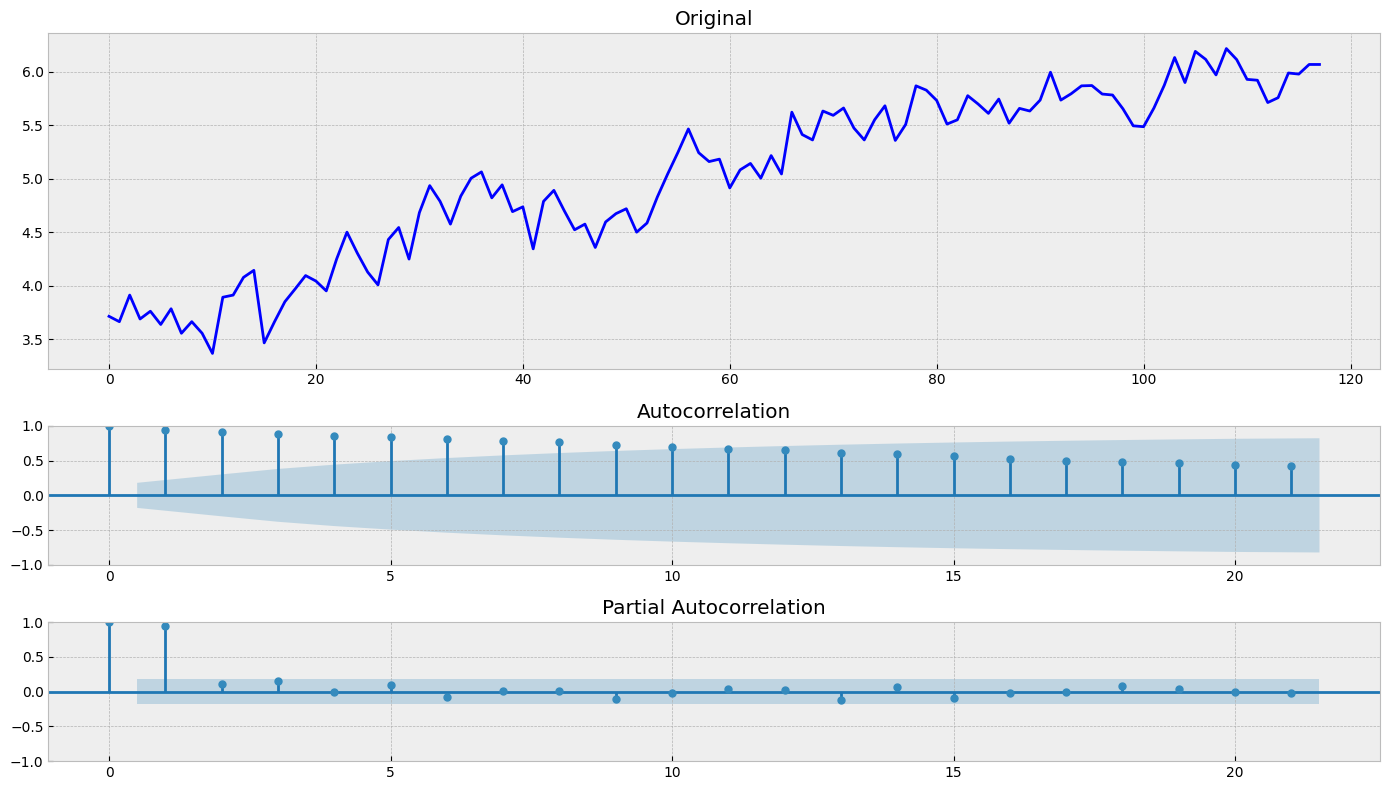

In [65]:
tsplot(series4)

Далее всопользуемся дифференцированием для того, чтобы избавиться от тренда.

In [66]:
series4 = np.diff(series4, 1)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


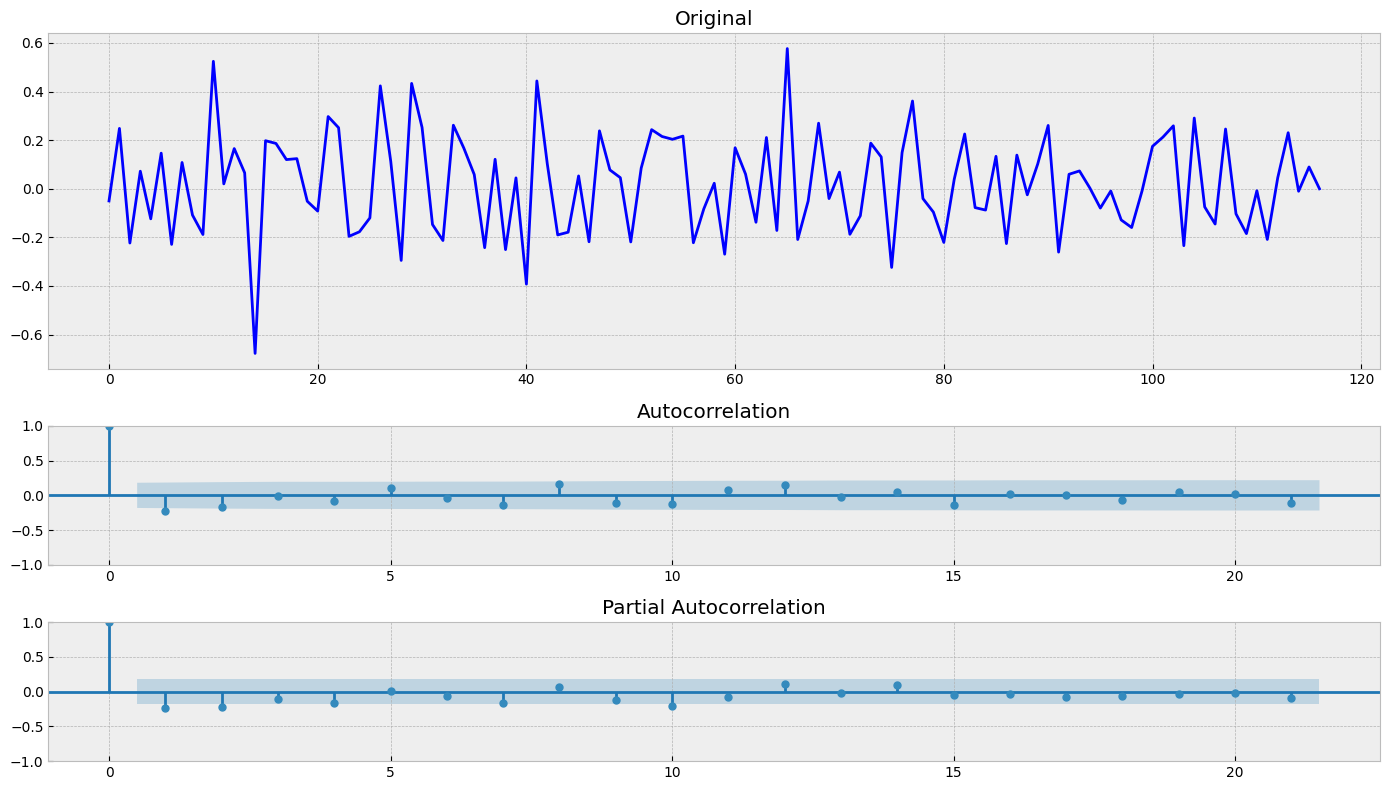

In [67]:
tsplot(series4)

Вывод по четвёртой серии: Значение p-value близко к машинному нулю. Тест

---

Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда. Следовательно, ряд стационарен.

Ряд 5

In [97]:
series5 = pd.read_csv("/content/monthly-sales-of-company-x-jan-6.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


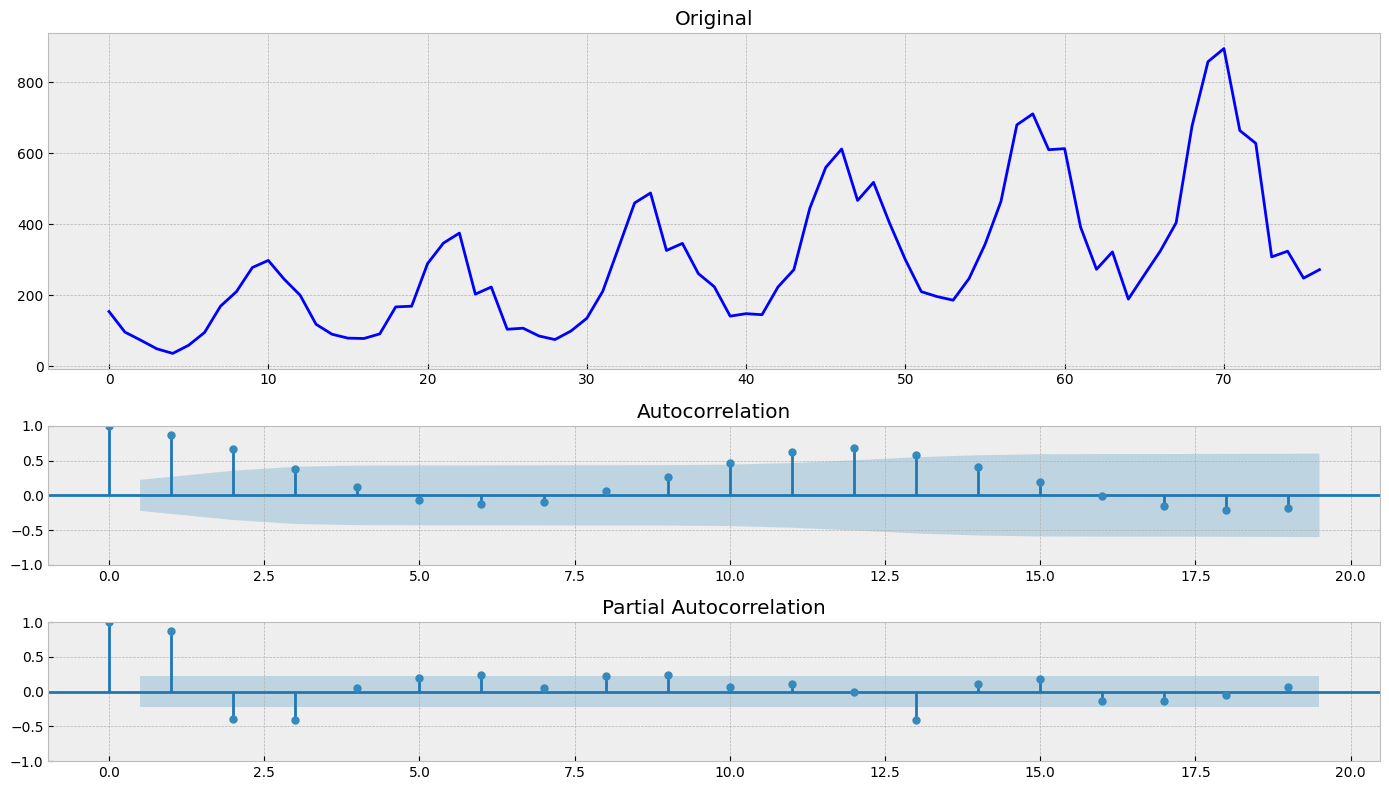

In [91]:
tsplot(series5)

Тест Дики-Фуллера не позволяет отвергнуть гипотезу о нестанционарности ряда. На графике видно наличие сезонности и тренда. Воспользуемся преобразованием Бокса-Кокса и дифференцированием.

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


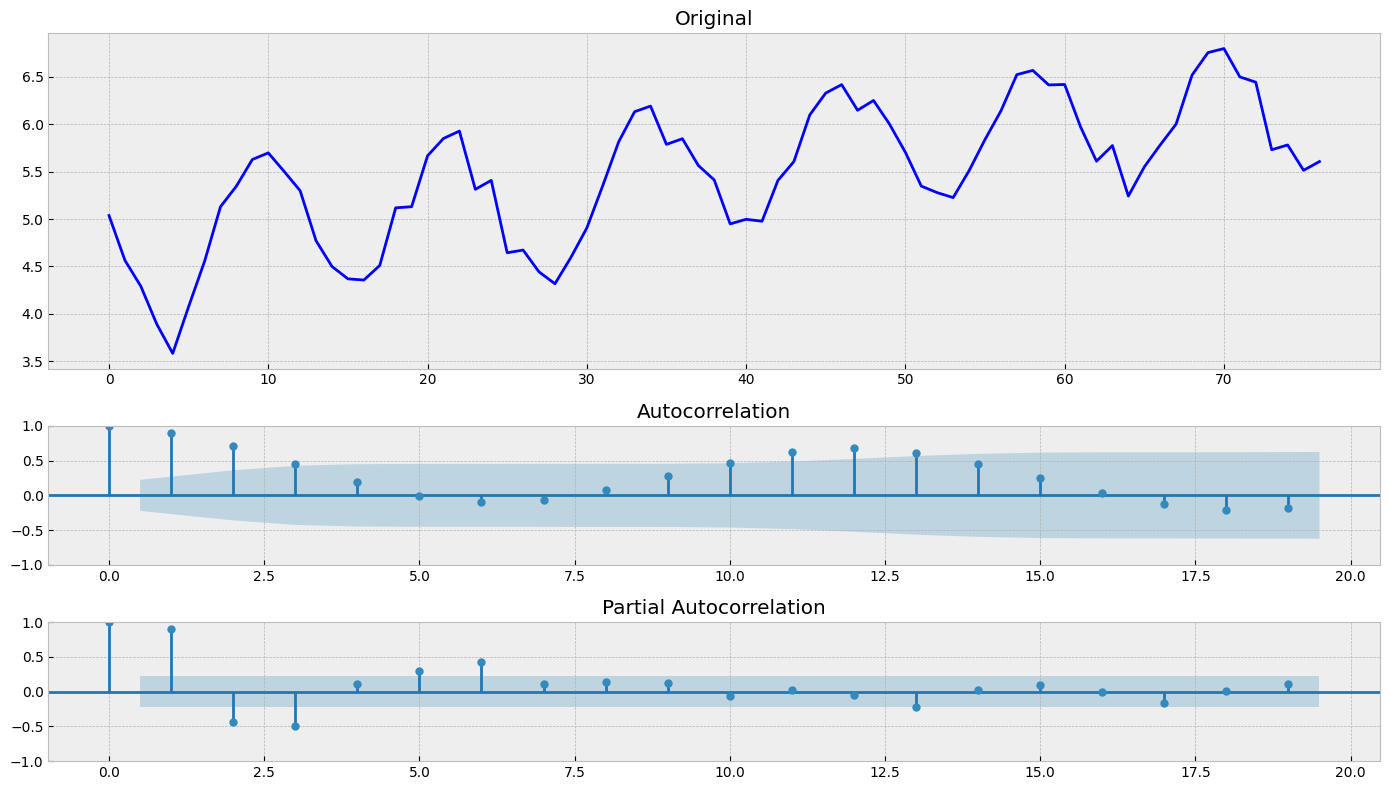

In [98]:
series5 = boxcox(series5, 0)
tsplot(series5)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


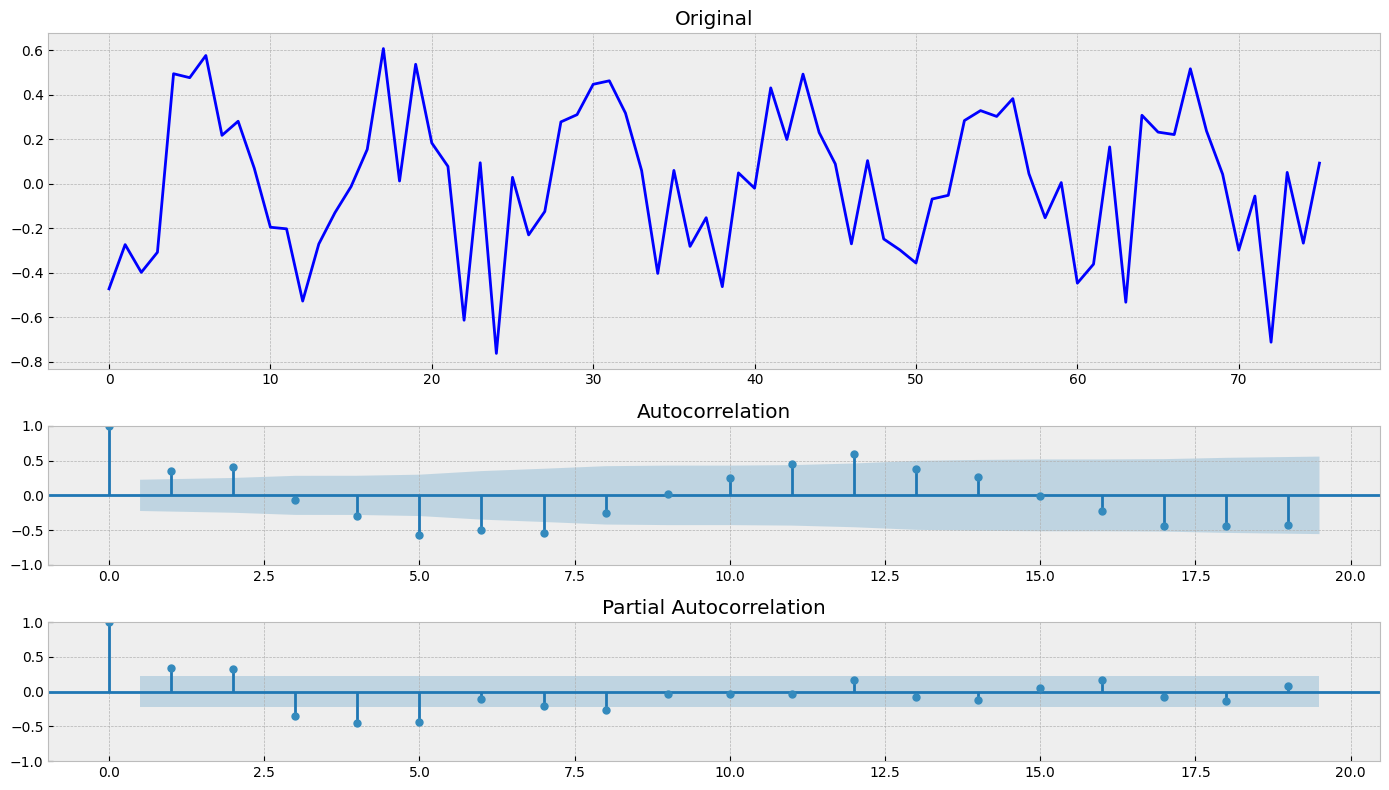

In [99]:
series5 = np.diff(series5, 1)
tsplot(series5)

In [100]:
series5 = np.diff(series5, 24)

Results of Dickey-Fuller Test:
Test Statistic                -1.207130e+01
p-value                        2.344420e-22
#Lags Used                     1.100000e+01
Number of Observations Used    4.000000e+01
Critical Value (1%)           -3.605565e+00
Critical Value (5%)           -2.937069e+00
Critical Value (10%)          -2.606986e+00
dtype: float64


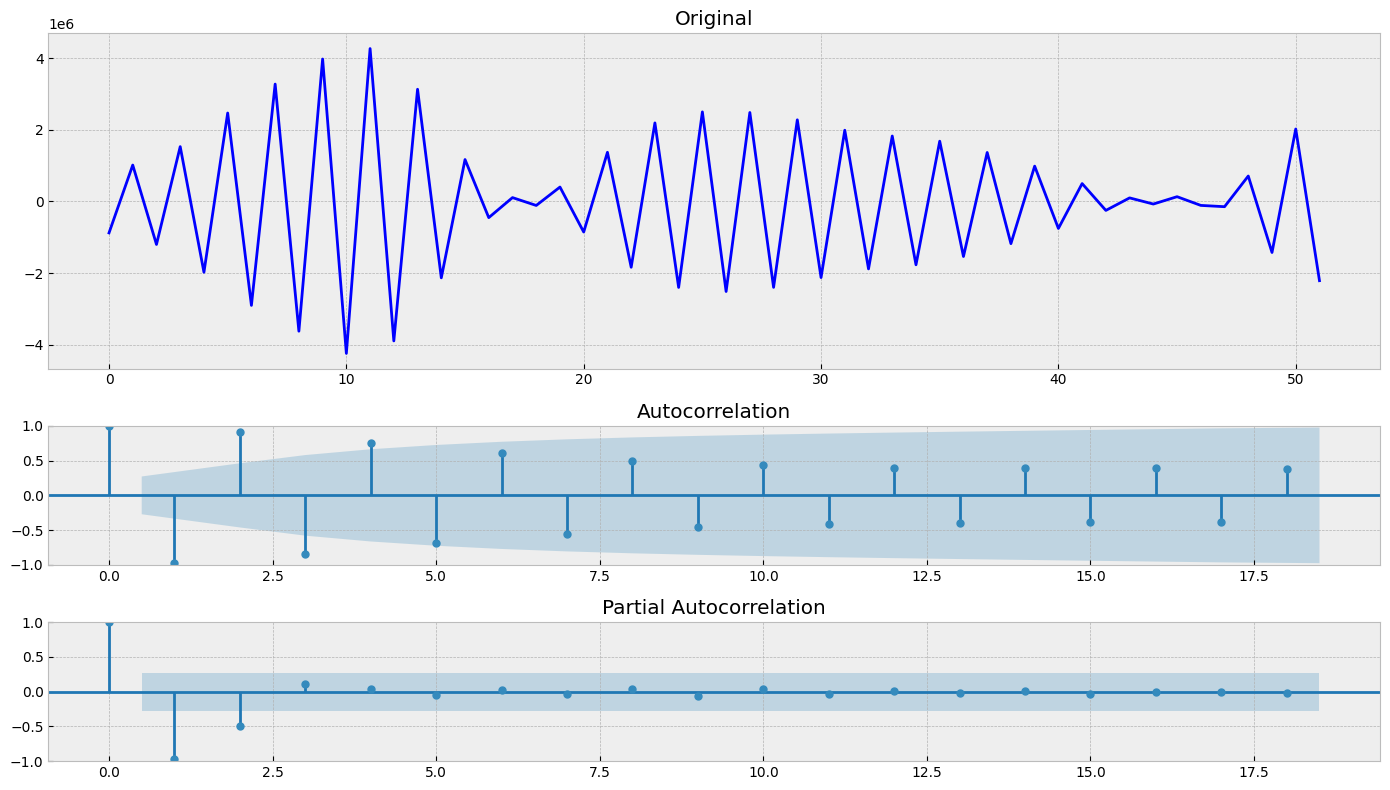

In [101]:
tsplot(series5)

Вывод по пятой серии: Значение p-value близко к машинному нулю. Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда. Следовательно, ряд стационарен.

Ряд 6

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


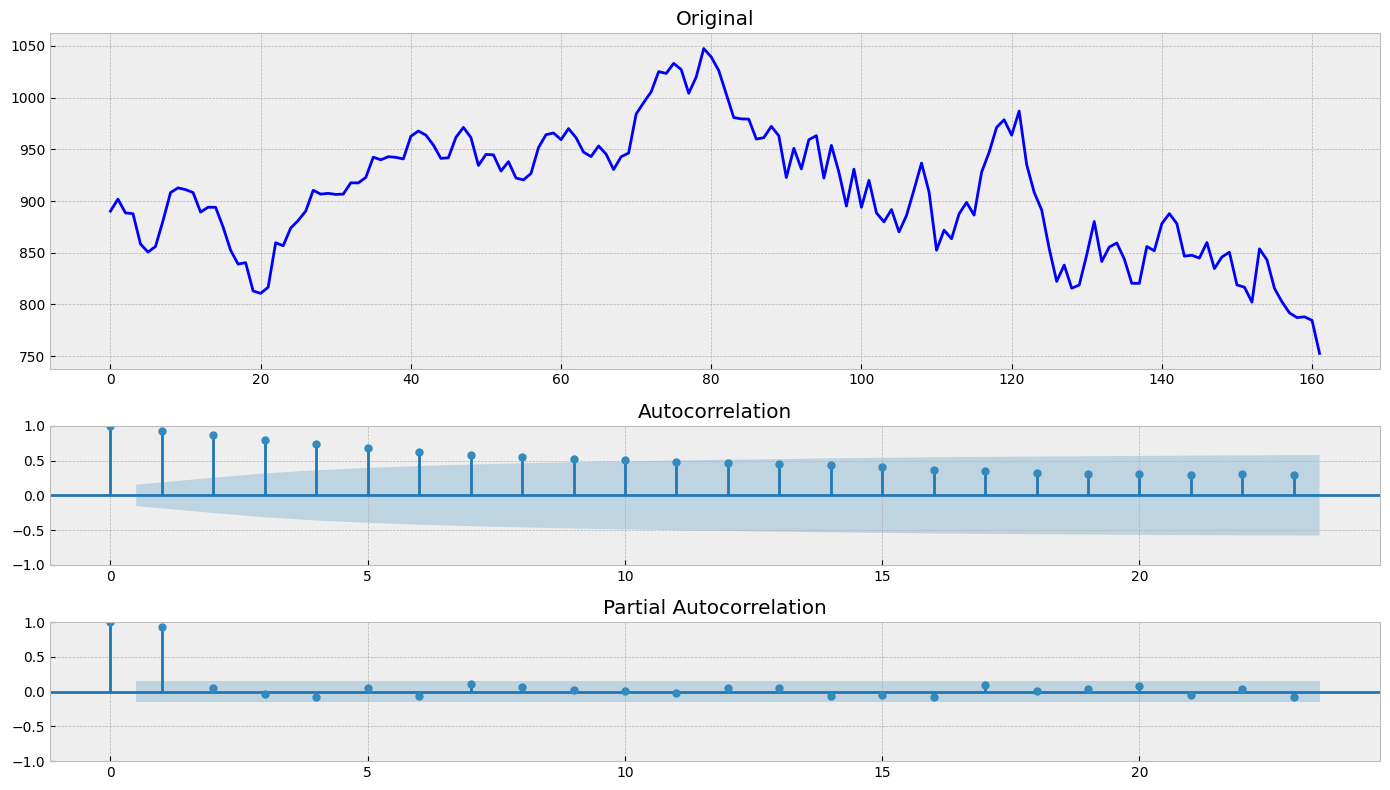

In [87]:
series6 = pd.read_csv("/content/weekly-closings-of-the-dowjones-.csv")['Close']
tsplot(series6)

Тест Дики-Фуллера и графики показывают, что ряд нестационарен. Применим к нему преобразования.

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


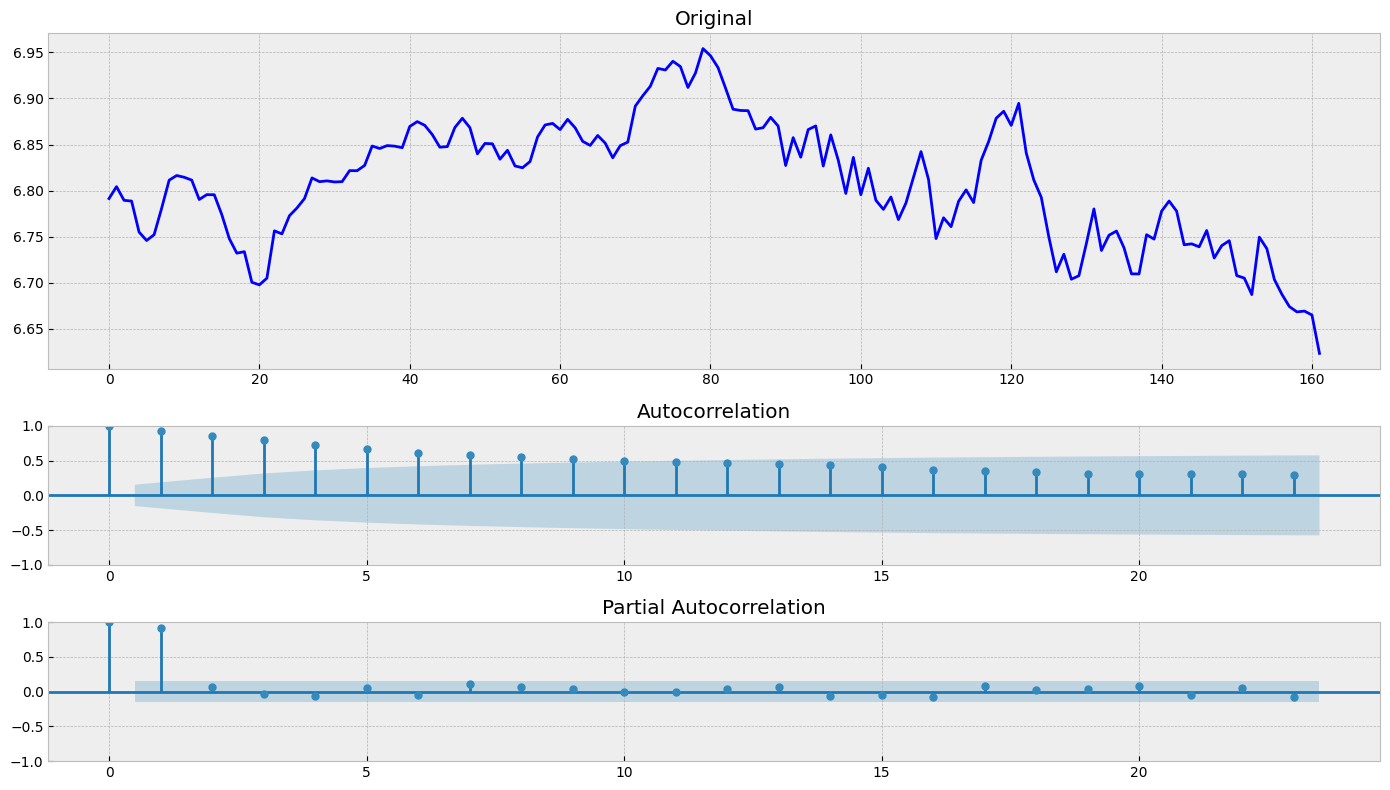

In [88]:
series6 = boxcox(series6, 0)
tsplot(series6)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


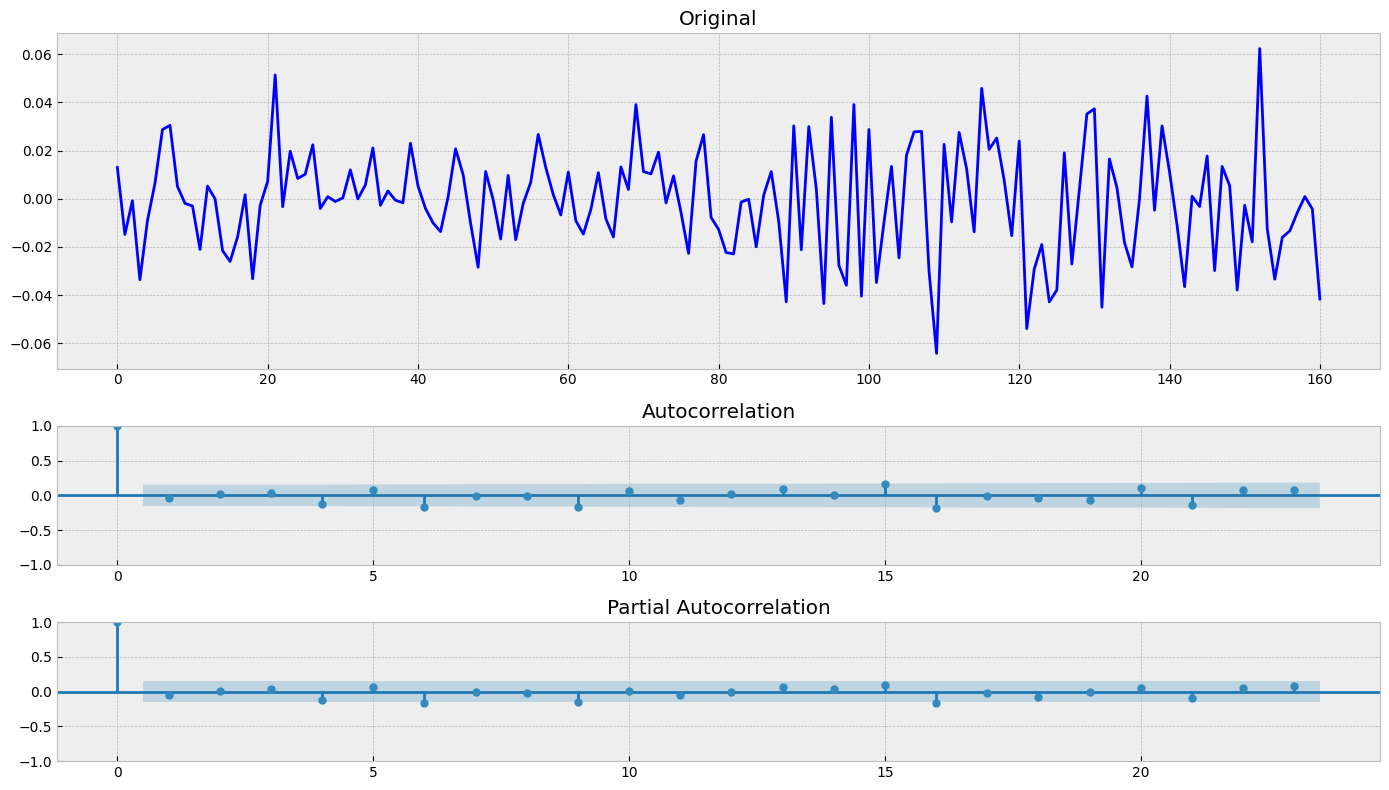

In [89]:
series6 = np.diff(series6, 1)
tsplot(series6)

Вывод по шестой серии: Значение p-value близко к машинному нулю. Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда. Следовательно, ряд стационарен.